In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./airline_tweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<AxesSubplot:xlabel='airline', ylabel='count'>

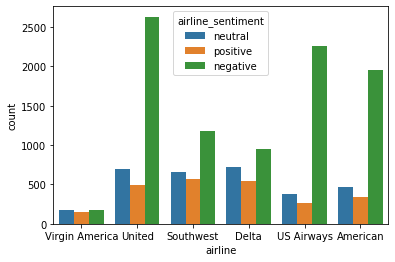

In [3]:
sns.countplot(x='airline', data=df, hue='airline_sentiment')

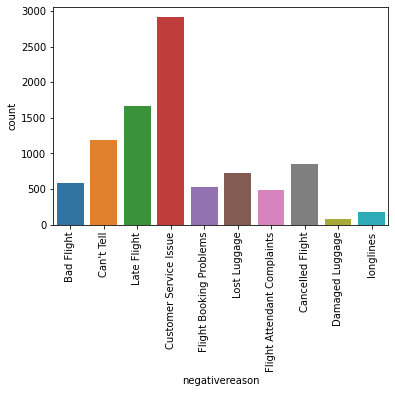

In [5]:
sns.countplot(x='negativereason', data=df)
plt.xticks(rotation=90);

<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

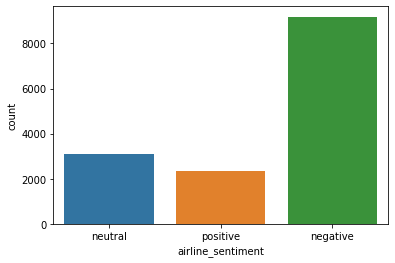

In [6]:
sns.countplot(x='airline_sentiment', data=df)

In [7]:
df['airline_sentiment'].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [8]:
data = df[['airline_sentiment', 'text']]
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [9]:
y = data['airline_sentiment']
X = data['text']

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
tfidf = TfidfVectorizer(stop_words='english')

In [13]:
tfidf.fit(X_train)

TfidfVectorizer(stop_words='english')

In [14]:
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [15]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

MultinomialNB()

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=1000)

In [18]:
from sklearn.svm import LinearSVC
svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)

LinearSVC()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
def report(model):
    y_pred = model.predict(X_test_tfidf)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [21]:
print("Naive Bayes")
report(nb)

Naive Bayes
[[1807    9    1]
 [ 524   97    7]
 [ 399   17   67]]
              precision    recall  f1-score   support

    negative       0.66      0.99      0.79      1817
     neutral       0.79      0.15      0.26       628
    positive       0.89      0.14      0.24       483

    accuracy                           0.67      2928
   macro avg       0.78      0.43      0.43      2928
weighted avg       0.73      0.67      0.59      2928



In [22]:
print("Logistic Regression")
report(logreg)

Logistic Regression
[[1695  101   21]
 [ 294  293   41]
 [ 133   70  280]]
              precision    recall  f1-score   support

    negative       0.80      0.93      0.86      1817
     neutral       0.63      0.47      0.54       628
    positive       0.82      0.58      0.68       483

    accuracy                           0.77      2928
   macro avg       0.75      0.66      0.69      2928
weighted avg       0.77      0.77      0.76      2928



In [23]:
print("SVM")
report(svc)

SVM
[[1624  158   35]
 [ 240  327   61]
 [ 106   69  308]]
              precision    recall  f1-score   support

    negative       0.82      0.89      0.86      1817
     neutral       0.59      0.52      0.55       628
    positive       0.76      0.64      0.69       483

    accuracy                           0.77      2928
   macro avg       0.73      0.68      0.70      2928
weighted avg       0.76      0.77      0.77      2928



In [24]:
from sklearn.pipeline import Pipeline

In [25]:
pipe = Pipeline([('tfidf',TfidfVectorizer()),('svc',LinearSVC())])

In [26]:
pipe.fit(df['text'], df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [27]:
new_tweet = ['I am so happy and joyful']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [28]:
new_tweet = ['I am so sad and miserable']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [29]:
new_tweet = ['I am so angry and furious']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [30]:
new_tweet = ['ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)